## Madrid Property Analysis

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
- This project uses the provided dataset to estimate property prices in Madrid, with a regression model using algorithms seen in class. Then the problem is redifined to create a classification problem. 

#### 2) Data Collection
- Dataset Source - The dataset was provided to us and is located in the data/raw directory. 
- The data consists of 17857 rows and 26 columns.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the Excel Data as Pandas DataFrame

In [9]:
df = pd.read_excel('../data/raw/session_7_dataset.xlsx')

Show Top 5 Records

In [16]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


Shape of the dataset

In [17]:
df.shape

(17857, 26)

##### 2.2 Dataset Information

 - Unnamed: 0: An index or identifier for the rows.
- inm_floor: The floor number on which the property is located.
- inm_size: The size of the property in square meters.
- inm_price: The listing price of the property.
- inm_longitude: The longitude coordinate of the property.
- inm_latitude: The latitude coordinate of the property.
- inm_barrio: The neighborhood name where the property is located.
- inm_distrito: The district name where the property is located.
- his_price: A historical pricing reference for the property.
- his_quarterly_variation: The change in price from the previous quarter.
- his_annual_variation: The change in price from the previous year.
- his_monthly_variation: The change in price from the previous month.
- dem_Indice_de_reemplazo_de_la_poblacion_activa: An index measuring the replacement rate of the working-age population.
- dem_Indice_de_juventud: An index measuring the youthfulness of the population.
- dem_Indice_de_estructura_de_la_poblacion_activa: An index reflecting the structure of the working-age population.
dem_Indice_de_dependencia: An index measuring the dependency ratio in the population.
- dem_TasaDeParo: The unemployment rate in the area.
- dem_TamanoMedioDelHogar: The average household size.
- dem_PropSinEstudiosUniversitarios: The proportion of the population without university-level education.
- dem_PropSinEstudios: The proportion of the population without any educational qualifications.
- dem_Proporcion_de_nacidos_fuera_de_Espana: The proportion of the population born outside of Spain.
- dem_PropConEstudiosUniversitarios: The proportion of the population with university-level education.
- dem_PobTotal: The total population in the area.
- dem_NumViviendas: The total number of dwellings in the area.
- dem_EdadMedia: The average age of the population in the area.
- dem_Densidad_(Habit/Ha): The population density per hectare in the area.



#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [18]:
df.isna().sum()

Unnamed: 0                                            0
inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                         

Here's how we will take care of the missing values
If there were a few or a small portion of values missing, we could delete them, however as the missing values are a large portion, we will do the following. 

- Mean / Median Imputation: For the numerical values, the mean/median imputation is one of the best techniques. Choosing which one from those will depend on how the data is skewed/ with outliers, (we will make a boxplot to visalize that)

- For categorical values, we can fill with placeholders. 


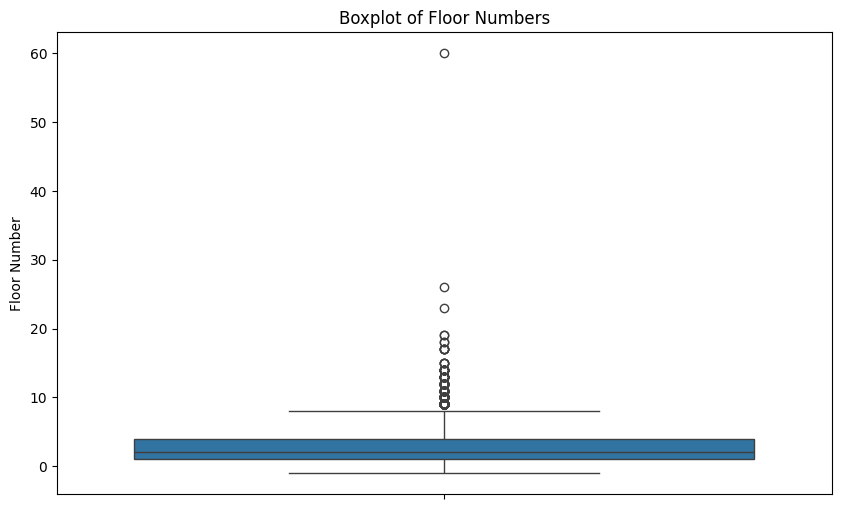

In [19]:
# Plotting the boxplot for the 'inm_floor' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['inm_floor'])
plt.title('Boxplot of Floor Numbers')
plt.ylabel('Floor Number')
plt.show()

Given the presence of outliers, using the median to impute missing values would be a better choice because the median is not affected by these extreme values as much as the mean would be. We can do so with the following.

In [20]:
# Calculate the median of the 'inm_floor' column
floor_median = df['inm_floor'].median()

# Replace missing values with the median
df['inm_floor'].fillna(floor_median, inplace=True)

Size is also very important and as we have many missing values, we can also perform a check for that. Instead of checking for outliers now, we can check and see if the data is very skewed, indicating we would need to use median imputation. 

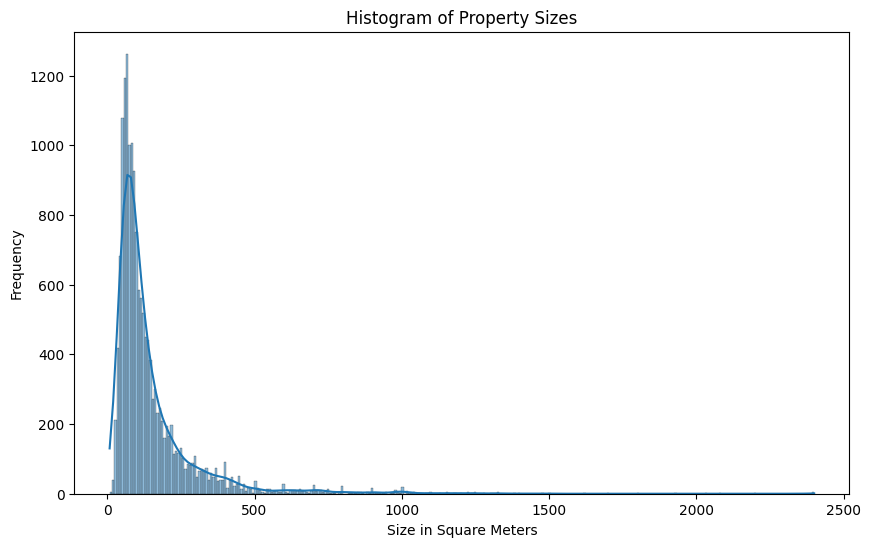

In [21]:
# Plotting the histogram for the 'inm_size' column
plt.figure(figsize=(10, 6))
sns.histplot(df['inm_size'], kde=True)
plt.title('Histogram of Property Sizes')
plt.xlabel('Size in Square Meters')
plt.ylabel('Frequency')
plt.show()

And as we can see, it appears to be very skewed, hence we will do median imputation. 

In [22]:
# Calculate the median of the 'inm_floor' column
floor_median = df['inm_floor'].median()

# Replace missing values with the median
df['inm_floor'].fillna(floor_median, inplace=True)

For inm_barrio and inm_distrito, as they are categorical values, we will use placeholder values of Unknown to fill them. 

In [23]:
# Fill missing values with "Unknown"
df['inm_barrio'].fillna('Unknown', inplace=True)
df['inm_distrito'].fillna('Unknown', inplace=True)